<a href="https://colab.research.google.com/github/ab-rohman/Computer_Vision/blob/main/Covid19_Data_Analitycs_%26_Visualizaation_(UAS_BIGDATA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SEPERTI BIASANYA KITA IMPORT LABRARY2 UTAMA YANG AKAN KITA GUNAKAN NANTI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

MOUNTING THE GDRIVE, BECAUSE I UPLOAD THE COVID-19 DATASET TO MY GDRIVE

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


INSTALLING OPENJDK FOR THE HADOOP ENVIRONTMENT

In [4]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

DOWNLOAD THE HADOOP AND SPARK

In [5]:
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz

In [7]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

PySpark isn't on sys.path by default, but that doesn't mean it can't be used as a regular library. You can address this by either symlinking pyspark into your site-packages, or adding pyspark to sys.path at runtime. findspark does the latter.

To initialize PySpark, just call

In [8]:
!pip install -q findspark

In [9]:
import findspark
findspark.init()

In [25]:
import pyspark
from pyspark.rdd import RDD
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions as F
from pyspark.sql.types import *
from pyspark.sql.functions import *

from pyspark.ml  import Pipeline     
from pyspark.sql.functions import mean,col,split, col, regexp_extract, when, lit

In [11]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
  .master("local")\
  .appName("Colab")\
  .config('spark.ui.port', '4050')\
  .getOrCreate()

In [12]:
df = spark.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load("/content/drive/MyDrive/BigData/covid_19.csv",header=True)

In [13]:
df.printSchema()

root
 |-- SNo: integer (nullable = true)
 |-- ObservationDate: string (nullable = true)
 |-- Province/State: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- Last Update: string (nullable = true)
 |-- Confirmed: double (nullable = true)
 |-- Deaths: double (nullable = true)
 |-- Recovered: double (nullable = true)



In [15]:
df.show(10)

+---+---------------+--------------+--------------+---------------+---------+------+---------+
|SNo|ObservationDate|Province/State|Country/Region|    Last Update|Confirmed|Deaths|Recovered|
+---+---------------+--------------+--------------+---------------+---------+------+---------+
|  1|     01/22/2020|         Anhui|Mainland China|1/22/2020 17:00|      1.0|   0.0|      0.0|
|  2|     01/22/2020|       Beijing|Mainland China|1/22/2020 17:00|     14.0|   0.0|      0.0|
|  3|     01/22/2020|     Chongqing|Mainland China|1/22/2020 17:00|      6.0|   0.0|      0.0|
|  4|     01/22/2020|        Fujian|Mainland China|1/22/2020 17:00|      1.0|   0.0|      0.0|
|  5|     01/22/2020|         Gansu|Mainland China|1/22/2020 17:00|      0.0|   0.0|      0.0|
|  6|     01/22/2020|     Guangdong|Mainland China|1/22/2020 17:00|     26.0|   0.0|      0.0|
|  7|     01/22/2020|       Guangxi|Mainland China|1/22/2020 17:00|      2.0|   0.0|      0.0|
|  8|     01/22/2020|       Guizhou|Mainland China

In [17]:
Province = df.select('Province/State').fillna('Unknown')
df = df.fillna({'Province/State':'Unknown'})

In [18]:
df.show(40)

+---+---------------+--------------+--------------+---------------+---------+------+---------+
|SNo|ObservationDate|Province/State|Country/Region|    Last Update|Confirmed|Deaths|Recovered|
+---+---------------+--------------+--------------+---------------+---------+------+---------+
|  1|     01/22/2020|         Anhui|Mainland China|1/22/2020 17:00|      1.0|   0.0|      0.0|
|  2|     01/22/2020|       Beijing|Mainland China|1/22/2020 17:00|     14.0|   0.0|      0.0|
|  3|     01/22/2020|     Chongqing|Mainland China|1/22/2020 17:00|      6.0|   0.0|      0.0|
|  4|     01/22/2020|        Fujian|Mainland China|1/22/2020 17:00|      1.0|   0.0|      0.0|
|  5|     01/22/2020|         Gansu|Mainland China|1/22/2020 17:00|      0.0|   0.0|      0.0|
|  6|     01/22/2020|     Guangdong|Mainland China|1/22/2020 17:00|     26.0|   0.0|      0.0|
|  7|     01/22/2020|       Guangxi|Mainland China|1/22/2020 17:00|      2.0|   0.0|      0.0|
|  8|     01/22/2020|       Guizhou|Mainland China

I will just tring to change some data

In [19]:
df = df.withColumn('Country/Region', regexp_replace('Country/Region', 'Mainland China', 'China'))

In [20]:
df.show(5)

+---+---------------+--------------+--------------+---------------+---------+------+---------+
|SNo|ObservationDate|Province/State|Country/Region|    Last Update|Confirmed|Deaths|Recovered|
+---+---------------+--------------+--------------+---------------+---------+------+---------+
|  1|     01/22/2020|         Anhui|         China|1/22/2020 17:00|      1.0|   0.0|      0.0|
|  2|     01/22/2020|       Beijing|         China|1/22/2020 17:00|     14.0|   0.0|      0.0|
|  3|     01/22/2020|     Chongqing|         China|1/22/2020 17:00|      6.0|   0.0|      0.0|
|  4|     01/22/2020|        Fujian|         China|1/22/2020 17:00|      1.0|   0.0|      0.0|
|  5|     01/22/2020|         Gansu|         China|1/22/2020 17:00|      0.0|   0.0|      0.0|
+---+---------------+--------------+--------------+---------------+---------+------+---------+
only showing top 5 rows



in here I add new column (for the Active cases only) that I called active cases just to make it easier to analyze the data

In [21]:
df = df.withColumn("Active_case", df['Confirmed'] - df['Deaths'] - df['Recovered'])

In [22]:
df.show(5)

+---+---------------+--------------+--------------+---------------+---------+------+---------+-----------+
|SNo|ObservationDate|Province/State|Country/Region|    Last Update|Confirmed|Deaths|Recovered|Active_case|
+---+---------------+--------------+--------------+---------------+---------+------+---------+-----------+
|  1|     01/22/2020|         Anhui|         China|1/22/2020 17:00|      1.0|   0.0|      0.0|        1.0|
|  2|     01/22/2020|       Beijing|         China|1/22/2020 17:00|     14.0|   0.0|      0.0|       14.0|
|  3|     01/22/2020|     Chongqing|         China|1/22/2020 17:00|      6.0|   0.0|      0.0|        6.0|
|  4|     01/22/2020|        Fujian|         China|1/22/2020 17:00|      1.0|   0.0|      0.0|        1.0|
|  5|     01/22/2020|         Gansu|         China|1/22/2020 17:00|      0.0|   0.0|      0.0|        0.0|
+---+---------------+--------------+--------------+---------------+---------+------+---------+-----------+
only showing top 5 rows



### **START ANALITYCS**

A. Analyze perkembangan kasus covid tiap hari

In [23]:
max_date =  df.select(max("ObservationDate")).first()
group = df.groupBy("ObservationDate")
group_data = group.agg({'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum', 'Active_case':'sum'}).sort(col("ObservationDate"))
group_data.show()

+---------------+--------------+-----------+--------------+----------------+
|ObservationDate|sum(Recovered)|sum(Deaths)|sum(Confirmed)|sum(Active_case)|
+---------------+--------------+-----------+--------------+----------------+
|     01/22/2020|          28.0|       17.0|         555.0|           510.0|
|     01/23/2020|          30.0|       18.0|         653.0|           605.0|
|     01/24/2020|          36.0|       26.0|         941.0|           879.0|
|     01/25/2020|          39.0|       42.0|        1438.0|          1357.0|
|     01/26/2020|          52.0|       56.0|        2118.0|          2010.0|
|     01/27/2020|          61.0|       82.0|        2927.0|          2784.0|
|     01/28/2020|         107.0|      131.0|        5578.0|          5340.0|
|     01/29/2020|         126.0|      133.0|        6165.0|          5906.0|
|     01/30/2020|         143.0|      171.0|        8235.0|          7921.0|
|     01/31/2020|         222.0|      213.0|        9925.0|          9490.0|

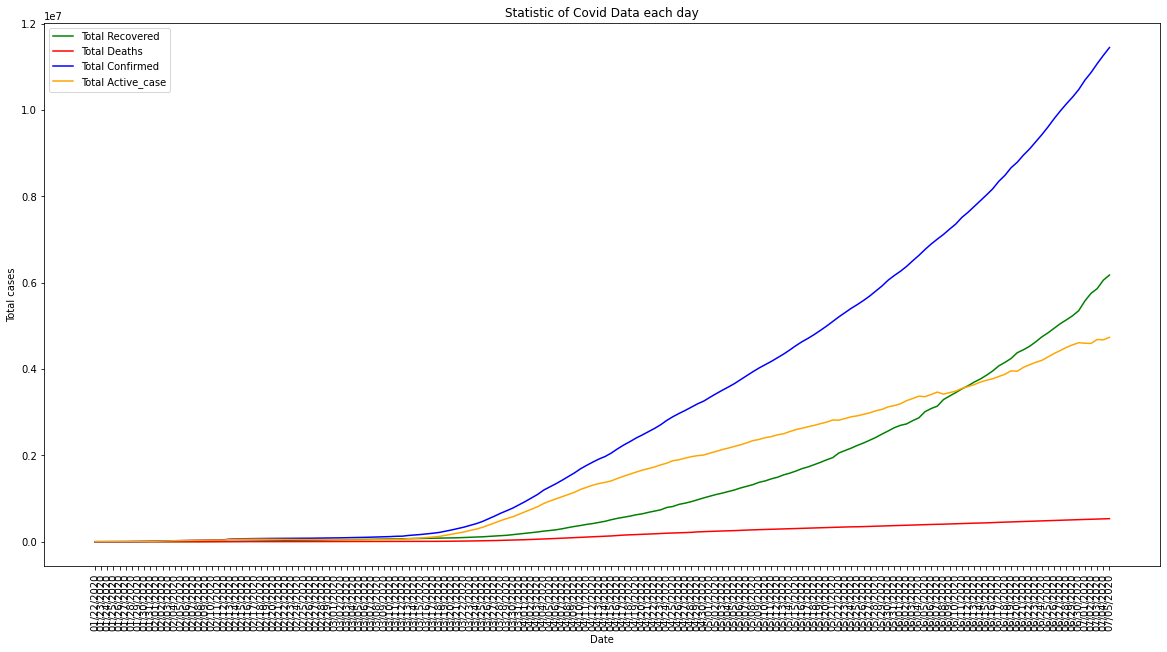

In [24]:
group_data=group_data.toPandas()
import matplotlib.pyplot as plt
ObservationDate = group_data['ObservationDate']
Recovered = group_data['sum(Recovered)']
Deaths = group_data['sum(Deaths)']
Confirmed = group_data['sum(Confirmed)']
Active_case = group_data['sum(Active_case)']
plt.figure(figsize=(20,10))
l1, = plt.plot(ObservationDate, Recovered, color='g')
l2, = plt.plot(ObservationDate, Deaths, color='r')
l3, = plt.plot(ObservationDate, Confirmed, color='b')
l4, = plt.plot(ObservationDate, Active_case, color='orange')
patches = [l1,l2,l3,l4]
labels = ['Total Recovered', 'Total Deaths', 'Total Confirmed', 'Total Active_case']
plt.legend(patches, labels, loc="best")
plt.xlabel('Date')
plt.ylabel('Total cases')
plt.title('Statistic of Covid Data each day')
plt.xticks(rotation=90)
plt.show()

In [26]:
mx_date=df.select(F.max("ObservationDate")).collect()[0][0]
Data_world = df.filter(F.col("ObservationDate")==mx_date).groupBy("ObservationDate").agg({'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum', 'Active_case':'sum'})
Data_world = Data_world.toPandas()

In [28]:
Data_world.head()

,ObservationDate,sum(Recovered),sum(Deaths),sum(Confirmed),sum(Active_case)
0,07/05/2020,6179006.0,534267.0,11449707.0,4736434.0


In [31]:
import plotly.express as px
labels = ["Total Active cases","Total Recovered cases","Total Deaths cases"]
values = Data_world.loc[0, ["sum(Active_case)","sum(Recovered)","sum(Deaths)"]]
fig = px.pie(Data_world, values=values, names=labels, color_discrete_sequence=['blue','green','red'])
fig.update_layout(
    title='Total cases : '+str(Data_world["sum(Confirmed)"][0]),
)
fig.show()